## <center><ins>Project 1 - A Mathematical Investigation of Populations and Predator-Prey Dynamics</ins>
<center> $\color{red}{\text{Due in Gradescope 7 March 2023 at 11:59 PM MST}}$ </center>
    
$\textbf{By Scott Hardman, Alex, Soren}$

# 1 Introduction
In the late 1980s, research scientists working for the National Forest Service in the Sierra Nevada conducted a study to understand why a
native population of mule deer had dramatically decreased in size from a 1950s census. The investigators believed that the initial reason for
the decrease in the deer population was over-population of the deer habitat. However, the population continued to decrease even after it had
been reduced to a size that the environment could support. The researchers wanted to find out why the deer population never recovered.
Over the course of the study, the investigators noticed that the native mountain lion population had steadily increased while the deer popula-
tion decreased. Mountain lions are natural predators of deer. It is generally believed that a predator species such as a mountain lion benefits
its prey population by keeping the prey population in balance with the environment. It does this by removing weak and old members of the
prey population that would otherwise consume resources needed for younger, healthier members of the population to survive. In this way,
the mountain lions (predators) are dependent upon the deer (prey) for their survival. The interactions of these species influence the evolution
of each population over time.
By studying the interactions of the deer and mountain lions, the researchers were able to deduce reasons why the deer population remained
depressed years after its initial decline.

# 2 Modeling Individual Populations: the Logistic Equation
Suppose that these scientists wanted to study the populations of mountain lions and deer mathematically. One way to approach this task is
to individually model each population to see how it changes with time (under a number of simplifying assumptions).

Assume the mountain lions are protected from hunting and have no natural predators. The mountain lions depend on the deer for food, but
the deer population is finite. Thus, the amount of food available to the mountain lions is limited. Since the two populations are being studied
separately, the mountain lion model must account for this constraint on its size without directly including the interactions of the mountain
lions and the deer. A reasonable way to represent the change in the mountain lion population is with the logistic equation

\begin{equation*}
\frac{dx}{dt}=r\left(1-\frac{x}{L}\right) x
\label{eq:exp_model} \tag{1}
\end{equation*}

In this equation, $x(t)$ is the size of the population (in dozens of animals) at any given time $t$ (in years). The parameter $r > 0$ is the intrinsic growth rate of the population and $L > 0$ is the carrying capacity of the population. An underlying assumption of this model is that the
population will grow exponentially in the absence of any external constraints on its size. We see this exponential behavior if we only include
the first term, $rx(t)$, of the equation. Of course, a population is naturally limited in size by the available resources such as food and/or
shelter. The second term in the equation, $−rx(t)2/L$, is a correction factor that models the effect of environmental constraints naturally
limiting the population’s growth.

To model the deer population, it is reasonable to start from a logistic-type model because the deer are similarly limited by the resources
in their environment. However, mountain lions are a natural predator of deer and are therefore a secondary means of restraining the deer
population. It is sensible that the deer population model should include a predation term. A simple way to include the effect of predation
on the deer population is to modify the logistic equation to include a “harvesting” term, $H(x)$, that represents the number of deer killed by
mountain lions. The modified logistic equation with harvesting become

\begin{equation*}
\frac{dx}{dt}=r\left(1-\frac{x}{L}\right) x - H(x)
\label{eq:log_model} \tag{2}
\end{equation*}

where the meaning of $x(t)$, $r$, and $L$ are the same as Eq. $\eqref{eq:exp_model}$. A reasonable harvesting function could be

\begin{equation*}
H(x) = \frac{px^2}{q+x^2}
\label{eq:harvest} \tag{3}
\end{equation*}

The parameters $p$ and $q$ represent how skilled the mountain lions are at catching deer.

# 2.1 Question Set A

1. What are the units of the parameters r and L?

- $r$ is the intrinsic growth rate of the population and it is unitless. $r$ cannot have any units because it represents the ratio of animals in the population that reproduce, or contribute to population growth, in a given time.

- The units of $L$ is animals (deer/mountain lions). $L$ represents the maximum number of animals the environment can sustain, or the carrying capacity.

2. Find the equilibrium solutions of Eq. (1) (the equation without harvesting). Then use separation of variables to find the exact (non-equilibrium) solution to Eq. (1). Your answer should be reported in terms of the unspecified variables $x$ and $t$, the parameters $r$,$L$, and some unknown initial population $x(0) = x_0$. Write your answer in explicit form, $x(t) = ···$.

<center> $\color{red}{\text{TO DO}}$

3. Suppose that the mountain lion population has an intrinsic growth rate of $r_m = 0.65$ and a carrying capacity of $L_m = 5.4$.

- (a) If there are initially $6$ mountain lions in the population, use Euler’s method over the interval $t \in [0,30]$ with step sizes $h_1 = 0.5$,$h_2 = 0.1$, and $h_3 = 0.01$ to numerically solve the logistic equation (1). Plot the numerical solutions against the exact solution found in Question 2 above. The plot should contain three numerical solution curves, the exact solution curve, and a legend. Also, be sure to appropriately label your axes here and in subsequent plots. Discuss the plot. Specifically address how the value of the step size $h$ influences the accuracy of the numerical solution. For clarity, consider using different colors and/or different types of curves (e.g. solid, dashed, dotted) in your plots.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
x0 = 6 # Initially 6 mtn lions
r = 0.65 # Given intrinsic growth rate
L = 5.4 # Given carrying capacity

# Step sizes
h1 = 0.5
h2 = 0.1
h3 = 0.01

# Intervals
I1 = np.arange(0,30,h1)
I2 = np.arange(0,30,h2)
I3 = np.arange(0,30,h3)

# Define equation (1)
def f(t, x):
    return r*(1-x/L)*x

# Use Euler's method to find approximations
def eulers(h,I):
    # Number of points to be calculated
    n = len(I)
    # List to hold estimate values
    x = np.zeros(n)
    x[0] = x0 # Set initial value
    # Estimate x values
    for i in range(n-1):
        x[i+1] = x[i] + h * f(I[i], x[i])
    # Return an array tuple we can graph
    return (I,x)

In [7]:
# The actual answer to the system:
def solution(t):
    return -t

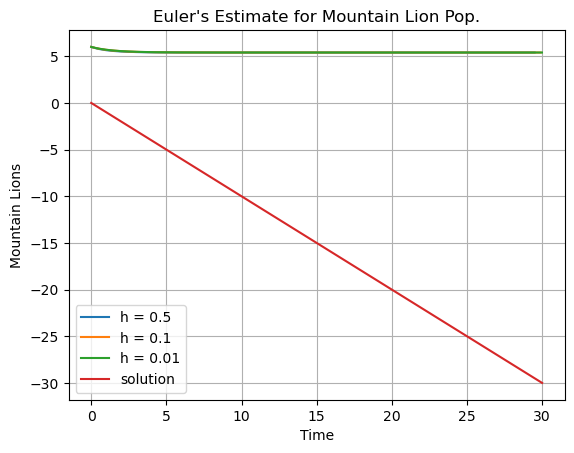

In [8]:
# Create graph of estimate with step size 0.5
t1, x1 = eulers(h1,I1)
plt.plot(t1, x1, label="h = 0.5")

# Create graph of estimate with step size 0.1
t2, x2 = eulers(h2,I2)
plt.plot(t2, x2, label="h = 0.1")

# Create graph of estimate with step size 0.01
t3, x3 = eulers(h3,I3)
plt.plot(t3, x3, label="h = 0.01")

t = np.linspace(0,30,1000)
x = solution(t)
plt.plot(t, x, label="solution")

# Make the plot pretty
plt.title("Euler's Estimate for Mountain Lion Pop.")
plt.xlabel("Time")
plt.ylabel("Mountain Lions")
plt.grid()
plt.legend()

plt.show()

- (b) The absolute error of a numerical approximation is defined by 
$$\text{Absolute Error} = \big| \text{Exact Solution} − \text{Approximate Solution} \big|$$
Use semilogy to plot the absolute errors of all numerical solutions found in part $(a)$. Plot these error curves together on one plot and be sure to include a legend. Describe the plot. In particular, speculate about why the error curves contain downward “spikes” around time $t = 7$. 

In [9]:
# Function to calculate the error in each estimate
def error(h, x):
     # Number of points to be calculated
    n = len(x)
    # List to hold error values
    e = np.zeros(n)
    # Find error values
    for i in range(n):
        e[i] = abs(x[i] - solution(h*i)) 
    # Return an array of error
    return e

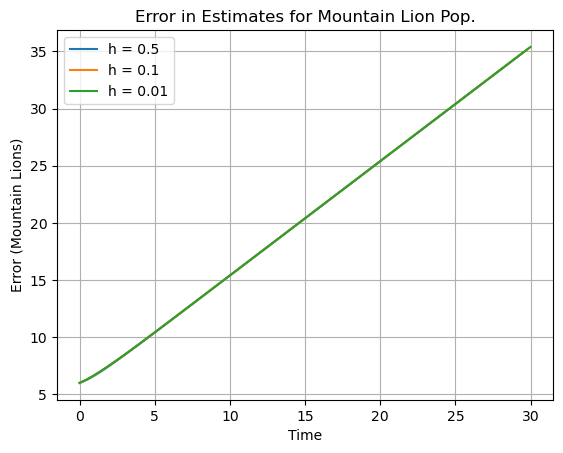

In [13]:
# Create graph of errors with step size 0.5
e1 = error(h1,x1)
plt.plot(t1, e1, label="h = 0.5")

# Create graph of errors with step size 0.1
e2 = error(h2,x2)
plt.plot(t2, e2, label="h = 0.1")

# Create graph of errors with step size 0.01
e3 = error(h3,x3)
plt.plot(t3, e3, label="h = 0.01")

# Make the plot pretty
plt.title("Error in Estimates for Mountain Lion Pop.")
plt.xlabel("Time")
plt.ylabel("Error (Mountain Lions)")
plt.grid()
plt.legend()

plt.show()

- (c) Whenever a problem is solved numerically, it is important to make sure that the calculation carefully balances numerical “accuracy” - the correctness of the approximation obtained with numerical “efficiency”, which is the amount of time (number of computations) needed to complete the calculation. For the calculations in part (a) above, which step size might give the best balance of numerical accuracy and efficiency? Justify your response (the result of part (b) may help)

<center> $\color{red}{\text{TO DO}}$

4. Classify the differential equation (2), the equation with harvesting. Is it linear? What is its order? Is it autonomous? Describe the physical meaning of autonomy or non-autonomy for this equation.

<center> $\color{red}{\text{TO DO}}$

5. Explore the behavior of the harvesting function (3) (a plot might help). What happens to H(x) as x becomes very large? What if x is close to 0? Does this make sense physically? Explain.

<center> $\color{red}{\text{TO DO}}$

6. Suppose the deer population also has an intrinsic growth rate of $r_d = 0.65$ but has a carrying capacity of $L_d = 8.1$ and let $p = 1.2$ and $q = 1$ in the harvesting function

- (a) Find the positive equilibrium solutions of Eq. (2) (to 4 decimal places) using the values of the parameters above. Graphing the right hand side of (2) may prove beneficial. The Matlab command `fzero` can be used to find the equilibrium solutions and information about this command can be obtained by typing help `fzero` in Matlab.

<center> $\color{red}{\text{TO DO}}$

- (b) Modify the code in `dirfield.m` in Matlab so that it computes the direction field of the logistic equation with harvesting (2)

<center> $\color{red}{\text{TO DO}}$

- (c) Use Euler’s method over the interval $t \in [0,30]$ with a step size of $h = 0.1$ to numerically solve the logistic equation with harvesting (2) four separate times assuming initial dear populations of 84, 24, 18, and 6 animals.

<center> $\color{red}{\text{TO DO}}$

- (d) Plot the Euler solutions from (c), the equilibrium solutions, and the direction field of (2) together against $t$, including a legend for the solution curves. Discuss the plot. In particular, describe how the behavior of the solution curves changes with the initial condition and speculate about why this might be. (Hint: think about the locations and stability of equilibrium solution

<center> $\color{red}{\text{TO DO}}$

# 3 Modeling Population Interactions
Other than the harvesting term used to describe the effect of predation on the deer population in (2), neither of the logistic equations (1) nor
(2) directly accounts for the interactions of the two populations. To more formally study how the populations respond to the pressures of
both internal competition and external predator-prey interactions, the models must be adjusted to include the interactions of predator and
prey and then solved simultaneously as a system. There are a number of ways to account for the interdependence of the two species.

# 3.1 The Lotka-Volterra System
One of the simplest models of predator-prey interactions is the Lotka – Volterra system

\begin{equation*}
\frac{dx_1}{dt}=-\alpha x_1 +\beta x_1 x_2
\\ \frac{dx_2}{dt} =\gamma x_2 - \delta x_1 x_2
\label{eq:LotkaVolterra} \tag{4}
\end{equation*}

The Lotka-Volterra system is a result of the Balance Law: the net rate of change of a population is equal to the rate in of members
(birth/immigration) minus the rate out of members (death/emigration). In this model, the variable $x_1$ represents the predator population and
$x_2$ represents the prey population. These variables both reside in the first quadrant of the $x_1 x_2$-plane, which is also called the population
quadrant. The positive parameters $\alpha$, $\beta$, $\gamma$, $\delta$ can be interpreted as follows:

<table>
  <tr>
    <td>&alpha;</td>
    <td>Predator mortality rate</td>
  </tr>
  <tr>
    <td>&beta;</td>
    <td>Predator attack rate / conversion efficiency (food into offspring)</td>
  </tr>
  <tr>
    <td>&gamma;</td>
    <td>Prey growth rate</td>
  </tr>
  <tr>
    <td>&delta;</td>
    <td>Prey mortality rate / searching efficiency / attack rate</td>
  </tr>
</table>

The cross terms, $\beta x_1x_2$ and $−\delta x_1x_2$, in this model represent the interactions of the two species. Notice that the predator population is
affected positively and the prey population is affected negatively by interactions. In other words, the abundance of food (prey) promotes
the predator’s growth rate but the presence of predators diminishes the prey’s growth rate. A basic assumption of this model is that, in
the absence of interaction, each population will obey an exponential growth model wherein the predator population $x′_1 = −\alpha x_1$ decays
exponentially to zero while the prey population $x′_2 = \beta x_2$ grows exponentially and without bound.

# 3.2 Question Set B

1. Classify the Lotka-Volterra system (4). Is it linear? Autonomous? What is its order?

<center> $\color{red}{\text{TO DO}}$

2. Analytically find the v and h nullclines and all equilibrium solutions of (4). DO NOT use specific values for any of the parameters $\alpha$, $\beta$, $\gamma$, or $\delta$.

<center> $\color{red}{\text{TO DO}}$

3. Assign the parameters in (4) the values $\alpha = 1.5$, $\beta = 1.1$, $\gamma = 2.5$, and $\delta = 1.4$. Modify the script flow.m in Matlab so it computes the vector field of the system (4). Plot the following together in the $x_1x_2$-plane (phase plane) and label the curves appropriately (note: the “$x_1x_2$”-plane (phase plane) means that the $x_1$ species is plotted on the x-axis and the $x_2$ species is plotted on the y-axis:

- (a) Use flow.m to plot the vector field of (4) on the domain −1 < x1 < 6, −1 < x2 < 6

- (b) Plot the nullclines of (4) on the domain $−1 < x1 < 6$, $−1 < x2 < 6$<br>
> i. Plot all nullclines that come from the $x′_1$ equation (v nullclines) in red<br>
> ii. Plot all nullclines that come from the $x′_2$ equation (h nullclines) in black

- (c) Mark all equilibrium solutions with green circles, filled for stable equilibria and open for unstable equilibria

<center> $\color{red}{\text{TO DO}}$

4. Use ode454 in Matlab to simulate solutions to (4) starting from the initial condition $x_1(0) = 0.5$, $x_2(0) = 1.0$ over the time interval $t \in [0, 30]$, then plot the following together:

- (a) Use flow.m to plot the vector field of (4) on the domain $−1 < x_1 < 6$, $−1 < x_2 < 6$

- (b) Plot the trajectory, the solutions of (4), on the domain $−1 < x_1 < 6$, $−1 < x_2 < 6$. The trajectory is the set of parametric points $(x_1(t), x_2(t))$ generated by plotting $x_2$ against $x_1$.

Does the solution curve behave as expected? Why or why not?

<center> $\color{red}{\text{TO DO}}$

5. Use ode45 in Matlab to simulate solutions to (4) starting from the initial condition $x_1(0) = 0.5$, $x_2(0) = 1.0$ over the time interval $t \in [0, 30]$. Plot the component curves $x_1(t)$ and $x_2(t)$ together against $t$ (include a legend). Discuss these plots. Are the curves in phase or out of phase? What does this mean physically in terms of predator-prey interactions? Note that the “component curve” solutions are given by all pairs of points $(t, x_1(t))$ and $(t, x_2(t))$.

<center> $\color{red}{\text{TO DO}}$

# 3.3 The Logistic Predator-Prey Equations

Recall that an underlying assumption of (4) is that both species will exhibit exponential behavior if there are no inter-species interactions,
that is, if the interaction terms $x_1x_2$ are excluded from the model. This assumption ignores the natural limits imposed on a prey population
by its environment, such as finite food. A slightly more complicated but realistic way to model predator-prey interactions is to adjust the
prey equation $x′_2$ to include these constraints, which gives rise to the Logistic Predator-Prey system

\begin{equation*}
\frac{dx_1}{dt}=-\alpha x_1 +\beta x_1 x_2
\\ \frac{dx_2}{dt} =\gamma(1-\kappa x_2) x_2 - \delta x_1 x_2
\label{eq:LogisticPredatorPrey} \tag{5}
\end{equation*}

Now the underlying assumption of this model is, in the absence of predation, the prey population will obey a logistic growth model instead
of an exponential growth model. This means that

- If the prey population is small, the rate of growth is approximately proportional to its size
- If the prey population is too large to be supported by its environment, the rate of change of the population will decrease

As in (4), if the species do not interact the predator population will exhibit exponentially decaying solutions.

# 3.4 Question Set C

1. Analytically find the $v$ and $h$ nullclines and equilibrium solutions of the Logistic Predator-Prey system (5).

<center> $\color{red}{\text{TO DO}}$

2. Assign the parameters in (5) the values $\alpha = 1.5$, $\beta = 1.1$, $\gamma = 2.5$, $\delta = 1.4$, and $\kappa = 0.5$. Modify the script flow.m in Matlab so it computes the vector field of the system (5). Use ode45 in Matlab to simulate solutions to (5) starting from the initial conditions $(x_1(0), x_2(0)) = (5, 1)$ and $(x_1(0), x_2(0)) = (1, 5)$ over the time interval $t \in [0, 30]$ and then, using the color scheme of Question Set B number 3, plot the following $together$:
- (a) Use flow.m to plot the vector field of (5) on the domain $−1 < x1 < 6$, $−1 < x2 < 6$
- (b) Plot the nullclines and the equilibrium solutions of (5) on the domain $−1 < x1 < 6$, $−1 < x2 < 6$
- (c) Plot the trajectories (x1, x2) on the domain $−1 < x1 < 6$, $−1 < x2 < 6$

Discuss the plot. What can you say about the stability of the equilibrium solutions? How does this influence the solution curve?

<center> $\color{red}{\text{TO DO}}$

3. Assign the parameters in (5) the values $\alpha = 1.5$, $\beta = 1.1$, $\gamma = 2.5$, $\delta = 1.4$, and $\kappa = 0.5$. Use ode45 in Matlab to simulate solutions to (5) starting from the initial conditions $(x_1(0), x_2(0)) = (5, 1)$ and $(x_1(0), x_2(0)) = (1, 5)$ over the time interval $t \in [0, 30]$. Plot the component curves $x_1(t)$ and $x_2(t)$ together against $t$, including a legend. Make a separate plot for each of the initial conditions. Discuss the solution curves. Are they periodic? Is there asymptotic behavior?

<center> $\color{red}{\text{TO DO}}$

# Model Comparison

Compare and contrast the Lotka-Volterra (4) and the Logistic Predator-Prey (5) models. What are some strengths and weaknesses of each
model? Propose a modification to one or both of these models that might increase the accuracy of their predictions. Why/how does this
improve the model?

<center> $\color{red}{\text{TO DO}}$